<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: Exercise</h2>
<div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [2]:
def genarate_data_1d(points, min, max, fn, noise, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(low=min, high=max, size=(points, 1))
    np.random.seed(seed)
    y = fn(x[:,0]) + np.random.normal(scale=noise, size=points)
    return x, y

def plot(x, y, pred_x=None, pred_y=None, ax=plt):
    ax.plot(x, y, '.', label='data')
    if pred_x is not None:
        ax.plot(pred_x, pred_y, '.', color='r', label='our function')
    ax.legend();

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise solved</strong>
  <p>Train a linear model to fit the data</p>
<div>

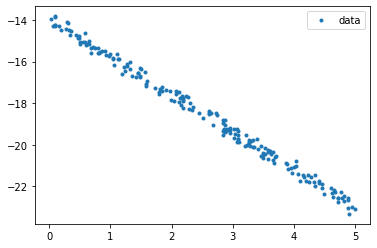

In [3]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=lambda x: -x*1.8 - 14, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

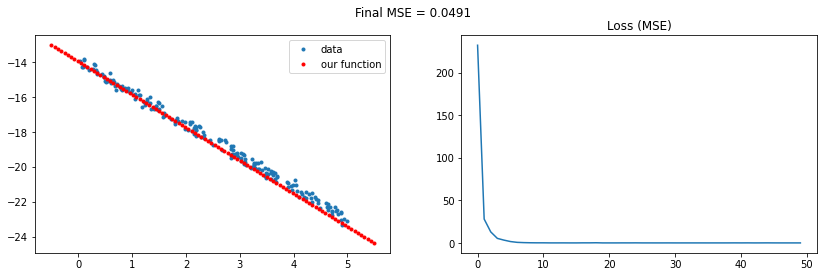

In [4]:
inp = keras.Input(shape=(1,))
out = layers.Dense(1, name='regression')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 1</strong>
  <p>Train a MLP in less than 100 epochs to get a MSE lower than 0.1</p>
<div>

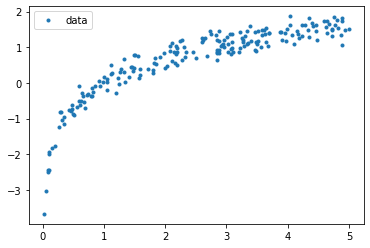

In [5]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=np.log, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 3         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


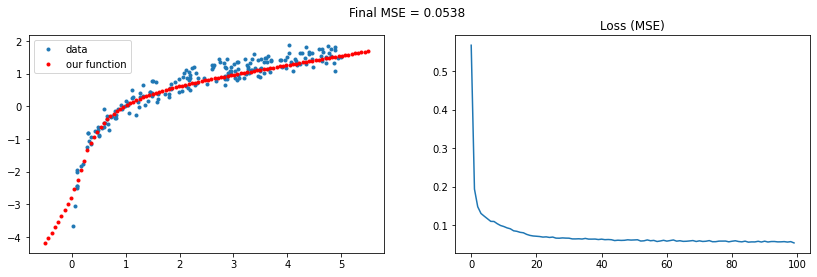

In [20]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='selu', kernel_initializer='zeros'))
model.add(Dense(2, activation='selu'))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
hist = model.fit(x, y, epochs=100, batch_size=2, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 2</strong>
  <p>Train a MLP in less than 100 epochs to get a loss lower than 0.06</p>
<div>

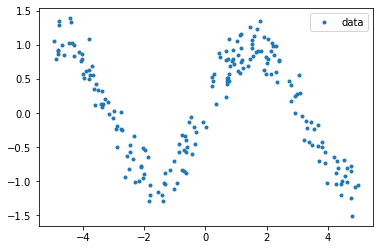

In [21]:
x,y = genarate_data_1d(points=200, min=-5, max=5, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-5.5, stop=5.5, num=100)

plot(x,y)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_61 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 11        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________


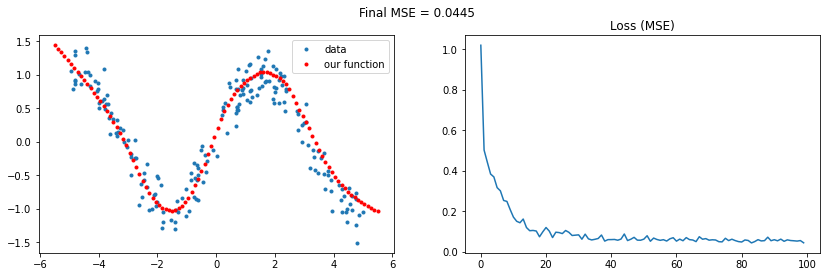

In [26]:
model = Sequential()
model.add(Dense(20, input_dim=1, activation='selu', kernel_initializer='zeros'))
model.add(Dense(15, activation='selu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
hist = model.fit(x, y, epochs=100, batch_size=10, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 3</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Hint: <strong style="color:#01ff84">Standard scale</strong> the data.</p>
<div>

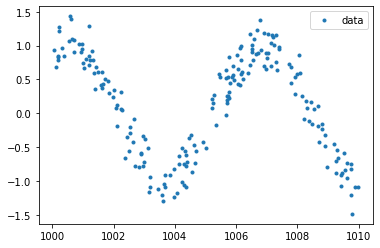

In [27]:
x,y = genarate_data_1d(points=200, min=1000, max=1010, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-2, stop=2, num=100)

plot(x,y)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_85 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 11        
Total params: 526
Trainable params: 526
Non-trainable params: 0
_________________________________________________________________


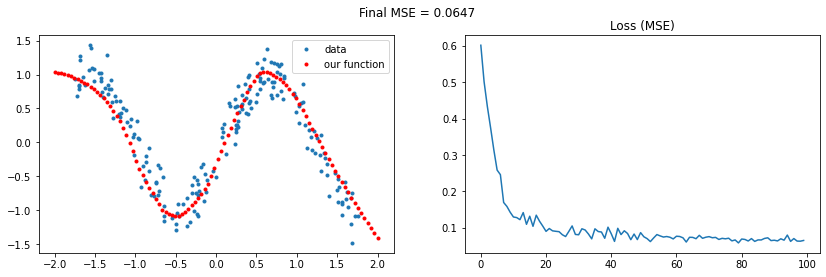

In [35]:
model = Sequential()
model.add(Dense(20, input_dim=1, activation='selu', kernel_initializer='zeros'))
model.add(Dense(15, activation='selu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
hist = model.fit(X, y, epochs=100, batch_size=2, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(X, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 4</strong>
  <p>Train a MLP to fit the data</p>
<div>

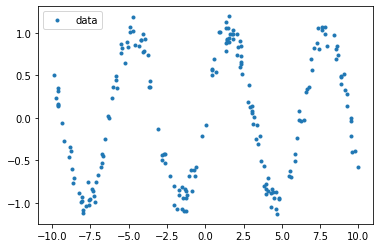

In [56]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=np.sin,  noise=0.1)
pred_x = np.linspace(start=-2, stop=2, num=200)

plot(x,y)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_169 (Dense)            (None, 25)                775       
_________________________________________________________________
dense_170 (Dense)            (None, 20)                520       
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 21        
Total params: 1,376
Trainable params: 1,376
Non-trainable params: 0
_________________________________________________________________


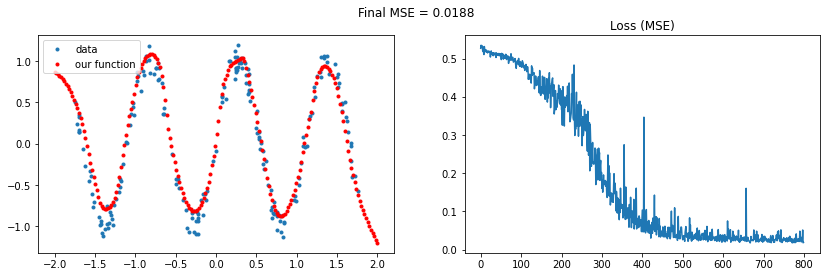

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

model = Sequential()
model.add(Dense(30, input_dim=1, activation='selu', kernel_initializer='zeros'))
model.add(Dense(25, activation='selu'))
model.add(Dense(20, activation='selu'))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
hist = model.fit(X, y, epochs=800, batch_size=5, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(X, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 5</strong>
  <p>Train a MLP to fit the data</p>
<div>

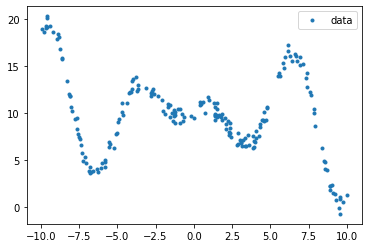

In [163]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=lambda x: np.cos(x)*x+10, noise=0.5)
pred_x = np.linspace(start=-2, stop=2, num=200)

plot(x,y)

Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_567 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_568 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_569 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_570 (Dense)            (None, 1)                 31        
Total params: 1,951
Trainable params: 1,951
Non-trainable params: 0
_________________________________________________________________


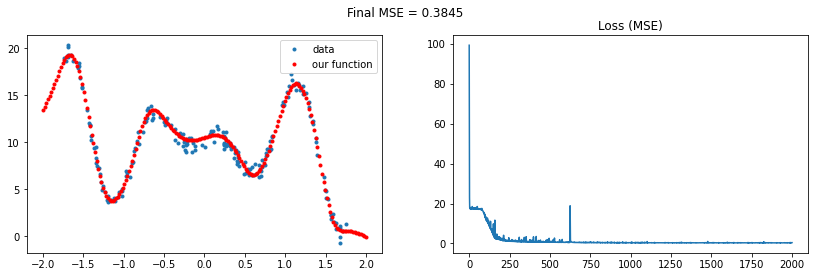

In [166]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

model = Sequential()
model.add(Dense(30, input_dim=1, activation='swish', kernel_initializer='zeros'))
model.add(Dense(30, activation='swish'))
model.add(Dense(30, activation='swish'))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
hist = model.fit(X, y, epochs=2000, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(X, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");


<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 6</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Train a LGBMRegressor to fit the data and visualize the predictions</p>
<div>

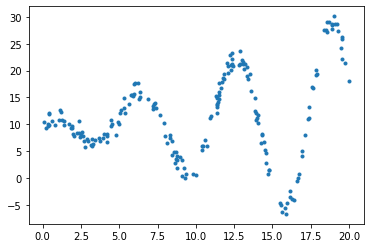

In [167]:
x,y = genarate_data_1d(points=200, min=0, max=20, fn=lambda x: np.cos(x)*x+10, noise=1)
pred_x = np.linspace(start=-2, stop=2, num=200).reshape(200,-1)

plt.plot(x,y,".");

Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_606 (Dense)            (None, 50)                100       
_________________________________________________________________
dense_607 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_608 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_609 (Dense)            (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


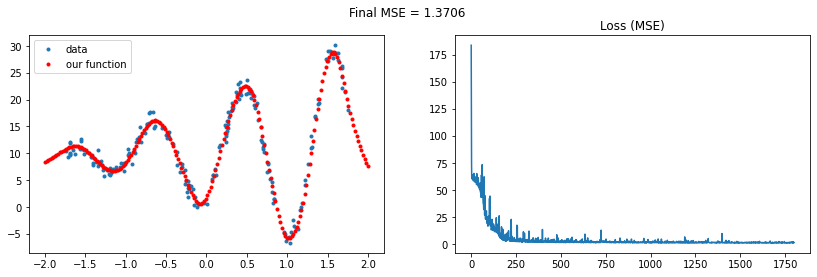

In [176]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

model = Sequential()
model.add(Dense(50, input_dim=1, activation='swish', kernel_initializer='zeros'))
model.add(Dense(50, activation='swish'))
model.add(Dense(50, activation='swish'))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer=optimizers.SGD(0.01))
hist = model.fit(X, y, epochs=1800, batch_size=36, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(X, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c44fdd82-8603-49c7-90a4-fcce2a1a7e73' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>